In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mprod import  m_prod
from mprod import  generate_haar, generate_dct

In [2]:
def tensor_frob_norm(A):
    return np.sqrt((A**2).sum())

In [3]:
def LSQR_mprod(A, C, funM, invM, itermax=100, tol=0.1, show_conv=False):
    ### A - n*l*p, C - n*s*p ###
    # initialization
    X = np.zeros((A.shape[1], C.shape[1], C.shape[2])) #X - l*s*p
    beta = tensor_frob_norm(C)
    U = C/beta
    
    V_wave = m_prod(np.transpose(A, (1, 0, 2)), U, funm_dct, invm_dct)
    alpha = tensor_frob_norm(V_wave)
    V = V_wave/alpha #l*s*p
    
    W = V.copy()
    ro_ = alpha
    fi_ = beta
    FI = []
    for i in range(itermax):
        # bidiagonalization
        U_wave = m_prod(A, V, funm_dct, invm_dct)-alpha*U
        beta = tensor_frob_norm(U_wave)
        U = U_wave/beta
             
        V_wave = m_prod(np.transpose(A, (1,0,2)), U, funm_dct, invm_dct) - beta*V
        alpha = tensor_frob_norm(V_wave)
        V = V_wave/alpha
        
        # orthogonal transformation
        ro = np.sqrt(ro_**2+beta**2)
        c = ro_/ro
        s = beta/ro
        
        theta = s*alpha
        ro_ = c*alpha
        fi = c*fi_
        fi_ = -s*fi_
        X = X + fi*W/ro
        W = V-theta*W/ro
        
        if abs(fi_)<tol:
            break
        if show_conv:
            FI.append(abs(fi_))
    if show_conv:  
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.plot(FI)
        plt.ylabel('||C-A*X||')
        plt.xlabel('num iteration')
        plt.title('all iterations')
        plt.subplot(122)
        plt.plot(range(len(FI))[-20:], FI[-20:])
        plt.ylabel('||C-A*X||')
        plt.xlabel('num iteration')
        plt.title('zoom in last 20 iterations')
        plt.show()
    return X

# create random A, X

In [4]:
n, l, s, p = 8, 10, 12, 15

# funm_dct, invm_dct = generate_dct(p)

A = np.random.randn(n, l, p)
X_true = np.random.randn(l, s, p)

# C = A *(M) X_true + Epsilon
## influence of different M

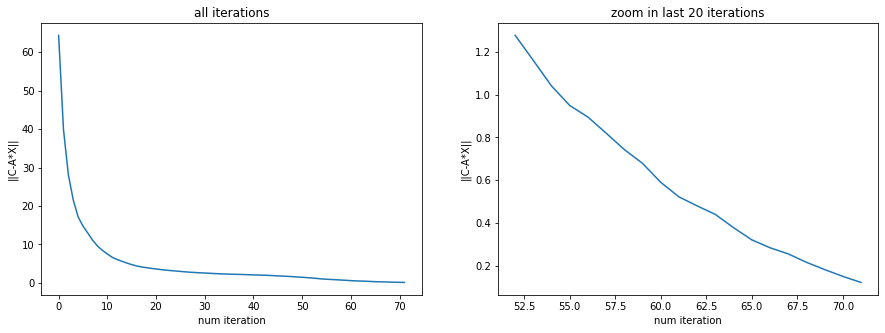

random state = 1, relative error = 0.98



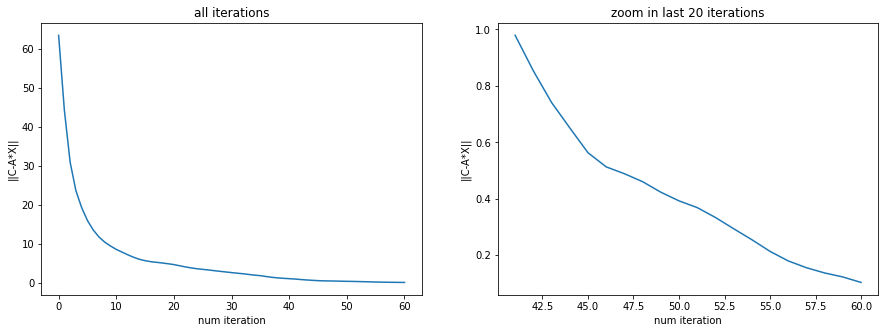

random state = 21, relative error = 1.02



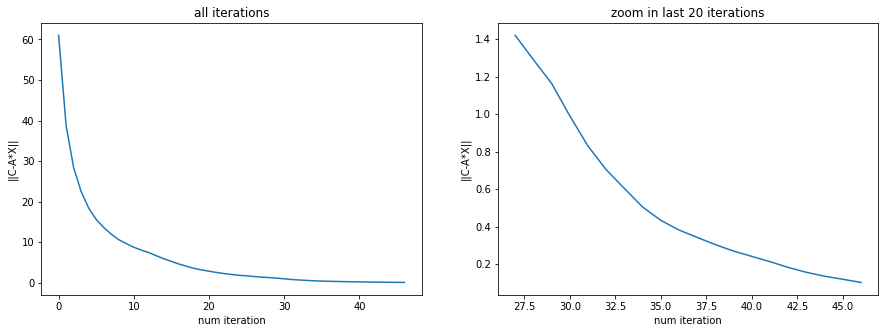

random state = 123, relative error = 0.87



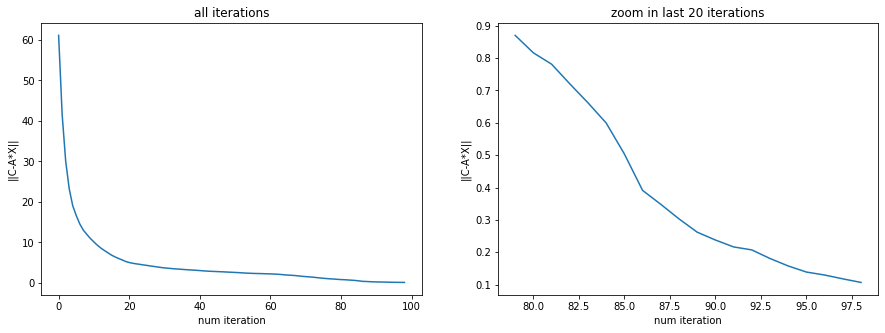

random state = dct, relative error = 1.37



In [7]:
Epsilon = np.random.randn(n, s, p)
for ran in [1,21,123, 'dct']:
    if ran == 'dct':
        funm_dct, invm_dct = generate_dct(p)
    else:
        funm_dct, invm_dct = generate_haar(p, random_state=ran)
    C = m_prod(A,X_true,funm_dct, invm_dct) + Epsilon
    X_lsqr = LSQR_mprod(A, C, funm_dct, invm_dct, show_conv=True)
    rel_error = tensor_frob_norm(X_lsqr-X_true)/tensor_frob_norm(X_true)
    print(f'random state = {ran}, relative error = {round(rel_error, 2)}\n')